In [1]:
pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 2.4 MB/s eta 0:00:24
    --------------------------------------- 1.0/56.8 MB 2.4 MB/s eta 0:00:24
   - -------------------------------------- 1.6/56.8 MB 2.4 MB/s eta 0:00:24
   - -------------------------------------- 2.4/56.8 MB 2.6 MB/s eta 0:00:22
   -- ------------------------------------- 2.9/56.8 MB 2.7 MB/s eta 0:00:21
   -- ------------------------------------- 3.7/56.8 MB 2.7 MB/s eta 0:00:20
   -- ------------------------------------- 3.9/56.8 MB 2.4 MB/s eta 0:00:22
   -- ------------------------------------- 4.2/56.8 MB 2.5 MB/s eta 0:00:22
   --- ------------------------------------ 4.5/56.8 MB 2.4 MB/s eta 0:00:23
   --- ------------------------------------ 5.0/56.8 MB 2.3 MB/s eta 0:00:23
   --- ------------------------------------ 5.2/56.8 MB 2.1 MB/s eta 0:00:25
   --- ------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Importing Boston House Price Datasets**

In [2]:
house_price_datasets = sklearn.datasets.fetch_california_housing()

In [4]:
print(house_price_datasets)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [7]:
#Loading the dataset to a pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_datasets.data, columns = house_price_datasets.feature_names)

In [8]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
house_price_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [10]:
# add the target column to the dataframe
house_price_dataframe['Price'] = house_price_datasets.target

In [11]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
# checking the number of rows and columns in the dataframe
house_price_dataframe.shape

(20640, 9)

In [16]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [17]:
# check for missing value
house_price_dataframe.isnull().sum

<bound method DataFrame.sum of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False     False     False   

       L

Understanding **Correlation** between various feature in dataset

1. Negative Correlation
2. Positive Correlation

In [18]:
correlation = house_price_dataframe.corr()

<Axes: >

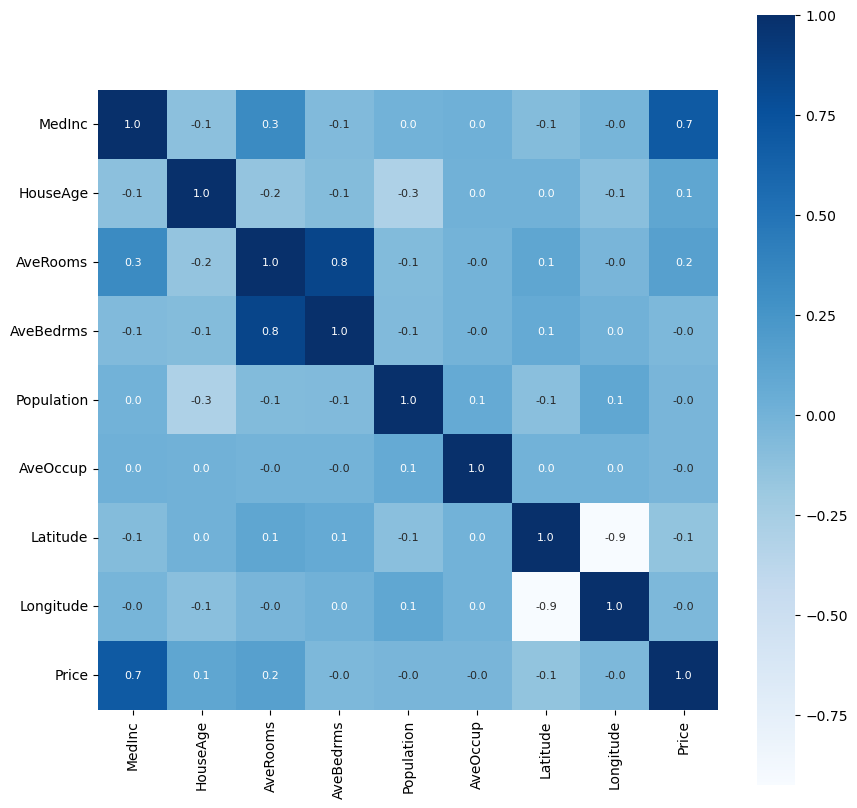

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and target

In [20]:
X = house_price_dataframe.drop(['Price'], axis=1)
Y = house_price_dataframe['Price']

In [21]:
print(X, Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Splitting the data into training data and test data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


**Model Training**

**XGBoost Regressor**

In [27]:
# Load the model
model = XGBRegressor()

In [29]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

**Evaluation**

**Prediction on training data**

In [32]:
# accuracy for prediction on training data
prediction = model.predict(X_train)

In [33]:
print(prediction)

[1.4162256 2.229103  2.2865145 ... 3.916217  2.5457225 1.5509608]


In [34]:
# R Squared Error
score_1 = metrics.r2_score(Y_train, prediction)
print('R Squarred Error:', score_1)

R Squarred Error: 0.9439154002012755


In [36]:
# Mean absolute Error
score_2 = metrics.mean_absolute_error(Y_train, prediction)
print('Mean Absolute Error:', score_2)

Mean Absolute Error: 0.19333650655515577


**Visualize the actuale prices and predicted prices**

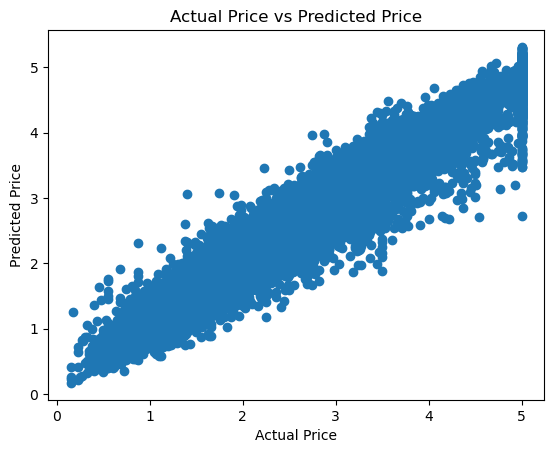

In [39]:
plt.scatter(Y_train, prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

**Evaluation**




**Prediction on test data**

In [40]:
# accuracy for prediction on test data
prediction_2 = model.predict(X_test)

In [41]:
print(prediction_2)

[1.2560753  0.94234014 1.9757392  ... 3.2985308  2.983024   1.4041145 ]


In [42]:
# R Squared Error
score_1 = metrics.r2_score(Y_test, prediction_2)
print('R Squared Error:', score_1)

R Squared Error: 0.8386188269983407


In [43]:
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, prediction_2)
print('Mean Absolute Error:', score_2)

Mean Absolute Error: 0.3008583316724222


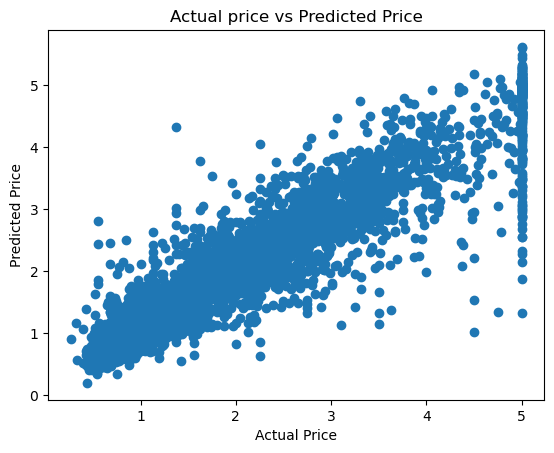

In [44]:
plt.scatter(Y_test, prediction_2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual price vs Predicted Price')
plt.show()

**R-squared error measures the proportion of the variance in the target variable that can be explained by the model**

**mean absolute error quantifies the average difference between the predicted and actual house prices**